In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import os

In [2]:
experiment_name="BCA_experiment4"

In [3]:
data = pd.read_csv("Data/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(["id"],axis=1, inplace = True)

In [5]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data["Unnamed: 32"].unique()
data.drop(["Unnamed: 32"], axis=1, inplace = True)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["diagnosis"] = le.fit_transform(data["diagnosis"])

In [8]:
data["diagnosis"].unique()

array([1, 0])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
import mlflow
from azureml.core import Workspace



In [11]:
# I needed to create my own custom config.json file that included my tenant_id and interactive login
# If you system is working you shouldn't need this added step
from azureml.core.authentication import InteractiveLoginAuthentication
import json

with open("config/config.json") as file:
    config = json.load(file)
interactive_auth=InteractiveLoginAuthentication(tenant_id=config["tenant_id"])
ws = Workspace(subscription_id=config["subscription_id"],
                  resource_group=config["resource_group"],
                  workspace_name=config["workspace_name"],
                  auth=interactive_auth)
mlflow.set_tracking_uri(ws.get_mlflow_tracking_uri())

If you run your code in unattended mode, i.e., where you can't give a user input, then we recommend to use ServicePrincipalAuthentication or MsiAuthentication.
Please refer to aka.ms/aml-notebook-auth for different authentication mechanisms in azureml-sdk.


In [12]:
#mlflow.set_tracking_uri("http://localhost:5001")

mlflow.set_experiment(experiment_name)


In [13]:
try:
    os.mkdir(f"deployments/{experiment_name}")
    os.mkdir(f"deployments/{experiment_name}/api")
    print(f"deployments/{experiment_name} created")

except FileExistsError:
    print(f"deployments/{experiment_name} exists")

deployments/BCA_experiment4 exists


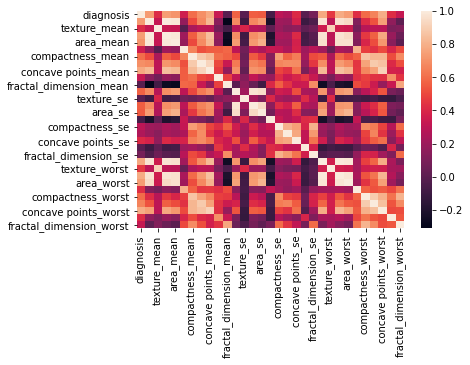

In [14]:
sns.heatmap(data.corr())
plt.show()

In [15]:
corr_cutoff = .7
top_corrs = list(data.corr()[(data.corr()>corr_cutoff) | (data.corr()<-corr_cutoff)].diagnosis.dropna().index)
top_corrs

['diagnosis',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

<AxesSubplot:>

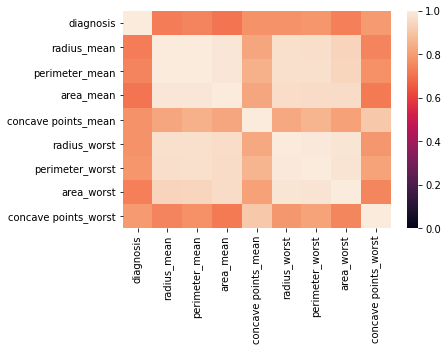

In [16]:
sns.heatmap(data[top_corrs].corr(),vmin=0)

In [17]:
from sklearn.model_selection import train_test_split
#top_corrs.remove("diagnosis")
X = data[top_corrs].drop("diagnosis",axis=1)
y = data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

test_models = [LogisticRegression(random_state = 0),
            KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
            SVC(kernel = 'rbf', random_state = 0),
            GaussianNB(),
            DecisionTreeClassifier(criterion="entropy", random_state=0),
            RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)]


In [20]:
def model_test(Model):
    model_type = type(Model).__name__
    print(model_type)
    Model.fit(X_train, y_train)

    run_name = "Basic " + model_type + " Experiment"
    print(run_name)
    with mlflow.start_run(run_name=run_name) as run:

        Model.fit(X_train, y_train)
        y_pred = Model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        print(cm)

        df_cm = pd.DataFrame(cm, index = ["T", "F"],
                  columns = ["T", "F"])
        plt.figure(figsize = (5,5))
        sns.heatmap(df_cm, annot=True)
        figname = "Confusion_Matrix_" + model_type
        # Log CM
        plt.savefig(figname)
        mlflow.log_artifact(figname+".png")

        score = accuracy_score(y_test, y_pred)

        # Log model
        mlflow.sklearn.log_model(Model, model_type+"-model")

        # Create metrics
        print(f"score: {score}")

        # Log metrics
        mlflow.log_metric("score", score)

        runID = run.info.run_uuid
        experimentID = run.info.experiment_id

        print(f"Inside MLflow Run with run_id `{runID}` and experiment_id `{experimentID}`")

LogisticRegression
Basic LogisticRegression Experiment
[[103   5]
 [  2  61]]
score: 0.9590643274853801
Inside MLflow Run with run_id `bcbe5b8c-904d-482b-81e2-09060add61f4` and experiment_id `f44ef18a-a515-4839-8ccf-99bbe398f2e4`
KNeighborsClassifier
Basic KNeighborsClassifier Experiment
[[104   4]
 [  5  58]]
score: 0.9473684210526315
Inside MLflow Run with run_id `20785204-b04c-4a72-8256-38cca0698fad` and experiment_id `f44ef18a-a515-4839-8ccf-99bbe398f2e4`
SVC
Basic SVC Experiment
[[105   3]
 [  6  57]]
score: 0.9473684210526315
Inside MLflow Run with run_id `480a9c7b-00d9-4de3-b0c1-a35664a6f69b` and experiment_id `f44ef18a-a515-4839-8ccf-99bbe398f2e4`
GaussianNB
Basic GaussianNB Experiment
[[104   4]
 [  5  58]]
score: 0.9473684210526315
Inside MLflow Run with run_id `da8c45b3-8321-4170-ab85-103e62791a99` and experiment_id `f44ef18a-a515-4839-8ccf-99bbe398f2e4`
DecisionTreeClassifier
Basic DecisionTreeClassifier Experiment
[[103   5]
 [  5  58]]
score: 0.9415204678362573
Inside MLf

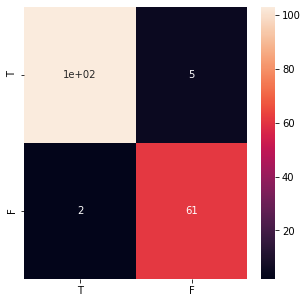

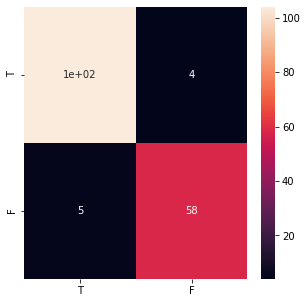

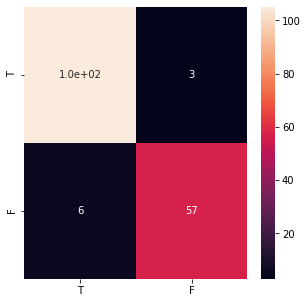

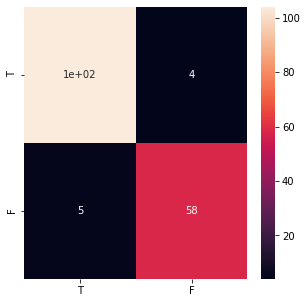

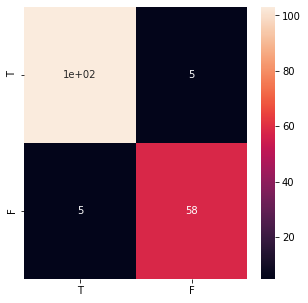

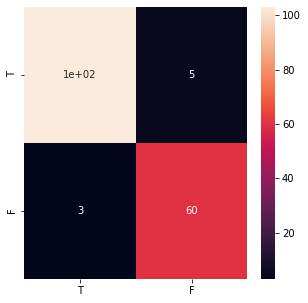

In [21]:
for model in test_models:
    model_test(model)

## Stage 2: Download Model



In [22]:
exp = ws.experiments[experiment_name]
runs = list(exp.get_runs())
high_score = [0, "run"]
for run in runs:
    try:
        print(run.get_metrics("score"))
        tmp = run.get_metrics("score")["score"]
        if tmp > high_score[0]:
            high_score = [tmp, run]
    except KeyError:
        pass

print(high_score[0],"\n",high_score[1])

{'score': 0.9532163742690059}
{'score': 0.9415204678362573}
{'score': 0.9473684210526315}
{'score': 0.9473684210526315}
{'score': 0.9473684210526315}
{'score': 0.9590643274853801}
{'score': 0.9415204678362573}
{'score': 0.9122807017543859}
{'score': 0.9415204678362573}
{'score': 0.9415204678362573}
{'score': 0.9473684210526315}
{'score': 0.9415204678362573}
{'score': 0.9415204678362573}
{'score': 0.9298245614035088}
{'score': 0.935672514619883}
{'score': 0.9298245614035088}
{'score': 0.9532163742690059}
{'score': 0.9298245614035088}
0.9590643274853801 
 Run(Experiment: BCA_experiment4,
Id: bcbe5b8c-904d-482b-81e2-09060add61f4,
Type: None,
Status: Completed)


In [23]:

high_score[1].download_files(output_directory=f"deployments/{experiment_name}")
filenames = high_score[1].get_file_names()
filenames

['Confusion_Matrix_LogisticRegression.png',
 'LogisticRegression-model/MLmodel',
 'LogisticRegression-model/conda.yaml',
 'LogisticRegression-model/model.pkl']

In [24]:
for file in filenames:
    if ".pkl" in file:
        file = file.split(r"/")
        dir_name = "/".join(file[:-1])

print(dir_name)

LogisticRegression-model


In [25]:
model_config_json = {"experiment_name":experiment_name,
                     "model_directory":dir_name}

with open(f"deployments/{experiment_name}/api/model_config.json", "w") as f:
    f.write(json.dumps(model_config_json))


## Stage 3: Create Flask app
See deployments/rfbca-container/api/FlaskAPI.py

In [26]:
from shutil import copyfile
copyfile("template/FlaskAPI.py", f"deployments/{experiment_name}/api/FlaskAPI.py")

'deployments/BCA_experiment4/api/FlaskAPI.py'

## Stage 4: Create Flask API as Docker Container

Created deployments/rfbca-containter/Dockerfile and deployments/rfbca-container/api/requirements.txt
DockerFile:

    FROM python:3.7.8
    MAINTAINER Alex McClead, Northwestern Student
    COPY ./api /usr/local/python/api
    COPY ./random_forest_model /usr/local/python/random_forest_model/
    EXPOSE 5010
    WORKDIR /usr/local/python/api/
    RUN pip install -r requirements.txt
    CMD python FlaskAPI.py

requirements.txt:

    flask
    flasgger
    scikit-learn
    pandas
    cloudpickle



In [27]:
dir = "./"+dir_name
dir2 = "/usr/local/python/" +dir_name
text = """FROM python:3.7.8
MAINTAINER Alex McClead, Northwestern Student
COPY ./api /usr/local/python/api
COPY {} {}
EXPOSE 5010
WORKDIR /usr/local/python/api/
RUN pip install -r requirements.txt
CMD python FlaskAPI.py
""".format(dir, dir2)
print(text)

FROM python:3.7.8
MAINTAINER Alex McClead, Northwestern Student
COPY ./api /usr/local/python/api
COPY ./LogisticRegression-model /usr/local/python/LogisticRegression-model
EXPOSE 5010
WORKDIR /usr/local/python/api/
RUN pip install -r requirements.txt
CMD python FlaskAPI.py



In [28]:
with open(f"deployments/{experiment_name}/Dockerfile","w") as f:
    f.write(text)

In [29]:
os.chdir(f"deployments/{experiment_name}")

In [30]:
text ="""flask
flasgger
scikit-learn
pandas
pickle5"""

with open("api/requirements.txt","w") as f:
    f.write(text)

In [31]:
container_name = experiment_name.lower().replace("_","")

!docker build -t $container_name:latest -f Dockerfile .


[+] Building 0.0s (0/1)                                                         
[+] Building 0.2s (2/3)                                                         
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.1s
[+] Building 0.3s (3/4)                                                         
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for dock

[+] Building 1.7s (9/10)                                                        
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 2.7s (9/10)                                                        
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 3.4s (9/10)                                                        
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 4.2s (9/10)                                                        
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 4.9s (9/10)                                                        
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 5.7s (9/10)                                                        
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 6.5s (9/10)                                                        
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 7.2s (9/10)                                                        
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 8.0s (9/10)                                                        
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 8.7s (9/10)                                                        
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 9.4s (9/10)                                                        
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 10.1s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 10.9s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 11.6s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 12.3s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 13.1s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 13.8s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 14.6s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 15.3s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 16.1s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 16.8s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 17.6s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 18.3s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 19.1s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 19.8s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 20.6s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 21.4s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 22.1s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 22.9s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 23.6s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 24.4s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 25.1s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 25.9s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 26.6s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 27.4s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 28.2s (9/10)                                                       
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 28.9s (10/11)                                                      
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 29.8s (10/11)                                                      
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

[+] Building 30.7s (10/11)                                                      
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 318B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.7.8            0.8s
 => [auth] library/python:pull token for registry-1.docker.io              0.0s
 => [internal] load build context                                          0.0s
 => => transferring context: 5.82kB                                        0.0s
 => CACHED [1/5] FROM docker.io/library/python:3.7.8@sha256:6ca82c8d96a24  0.0s
 => [2/5] COPY ./api /usr/local/python/api                                 0.0s
 => [3/5] COPY ./LogisticRegression-model /usr/local/python/LogisticRegre  0.0s
 => [4/5] WORKDIR /usr/local/python/api

In [32]:
!docker run -d --rm -p5010:5010 --name $container_name $container_name:latest

01a11ebdde26cbf19c2ca9e42a5f0f111e122bd5accfea8f5a2ae9b59aa093bc


In [33]:
!docker ps

CONTAINER ID   IMAGE                   COMMAND                  CREATED        STATUS                  PORTS                                       NAMES
01a11ebdde26   bcaexperiment4:latest   "/bin/sh -c 'python …"   1 second ago   Up Less than a second   0.0.0.0:5010->5010/tcp, :::5010->5010/tcp   bcaexperiment4


In [34]:
!docker stop $container_name

bcaexperiment4


In [35]:
os.chdir("../..")

## Step 5: send to container registry

In [36]:
!az login


The default web browser has been opened at https://login.microsoftonline.com/common/oauth2/authorize. Please continue the login in the web browser. If no web browser is available or if the web browser fails to open, use device code flow with `az login --use-device-code`.
You have logged in. Now let us find all the subscriptions to which you have access...
[
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "3bc2cef2-ee50-4617-ace0-60711f552410",
    "id": "866c4e79-e0a1-4dee-a2ea-3d271946611e",
    "isDefault": true,
    "managedByTenants": [],
    "name": "Azure subscription 1",
    "state": "Enabled",
    "tenantId": "3bc2cef2-ee50-4617-ace0-60711f552410",
    "user": {
      "name": "mccleadshared@gmail.com",
      "type": "user"
    }
  }
]


In [37]:
!az acr login --name cisfinalcr


Login Succeeded


In [38]:
# build and push to acr
import os
os.chdir(f"deployments/{experiment_name}")
!az acr build --image $container_name:latest --registry cisfinalcr --file Dockerfile .

Packing source code into tar to upload...
Uploading archived source code from '/var/folders/ff/7hrzbb8d5471gv165drbv3sw0000gn/T/build_archive_02e8d4c37532438cbf9ec9ef3d20a1e9.tar.gz'...
Sending context (49.101 KiB) to registry: cisfinalcr...
Queued a build with ID: cj7                                  
Waiting for an agent...
2021/05/30 21:21:06 Downloading source code...
2021/05/30 21:21:07 Finished downloading source code
2021/05/30 21:21:08 Using acb_vol_9711536c-289c-41c1-803f-cd290c79305f as the home volume
2021/05/30 21:21:08 Setting up Docker configuration...
2021/05/30 21:21:09 Successfully set up Docker configuration
2021/05/30 21:21:09 Logging in to registry: cisfinalcr.azurecr.io
2021/05/30 21:21:10 Successfully logged into cisfinalcr.azurecr.io
2021/05/30 21:21:10 Executing step ID: build. Timeout(sec): 28800, Working directory: '', Network: ''
2021/05/30 21:21:10 Scanning for dependencies...
2021/05/30 21:21:10 Successfully scanned dependencies
2021/05/30 21:21:10 Launchin

6ecbf0db5cd6: Pushed
latest: digest: sha256:fd41b2269af8bdcc5ea66275f22f85f1c2377762ed825e6ac991ab96068f8f57 size: 2847
2021/05/30 21:22:54 Successfully pushed image: cisfinalcr.azurecr.io/bcaexperiment4:latest
2021/05/30 21:22:54 Step ID: build marked as successful (elapsed time in seconds: 70.958001)
2021/05/30 21:22:54 Populating digests for step ID: build...
2021/05/30 21:22:55 Successfully populated digests for step ID: build
2021/05/30 21:22:55 Step ID: push marked as successful (elapsed time in seconds: 33.074631)
2021/05/30 21:22:55 The following dependencies were found:
2021/05/30 21:22:55 
- image:
    registry: cisfinalcr.azurecr.io
    repository: bcaexperiment4
    tag: latest
    digest: sha256:fd41b2269af8bdcc5ea66275f22f85f1c2377762ed825e6ac991ab96068f8f57
  runtime-dependency:
    registry: registry.hub.docker.com
    repository: library/python
    tag: 3.7.8
    digest: sha256:6ca82c8d96a24523a71f40bb38f5682b18ca74a7a19586927c79e714b1b906c4
  git: {}


Run ID: cj7 was

In [39]:
os.chdir("../..")

In [40]:
!az acr repository list --name cisfinalcr

[
  "bca-api",
  "bca_experiment2",
  "bca_experiment3",
  "bcaexperiment4"
]


## Step 6: Configure kuber cluster

Created yaml file deployments/rfbca-container/kuber.yaml:

    apiVersion: apps/v1
    kind: Deployment
    metadata:
      name: bca-api-prediction
    spec:
      replicas: 1
      selector:
        matchLabels:
          app: bca-api-prediction
      strategy:
        rollingUpdate:
          maxSurge: 1
          maxUnavailable: 1
      minReadySeconds: 5
      template:
        metadata:
          labels:
            app: bca-api-prediction
        spec:
          nodeSelector:
            "beta.kubernetes.io/os": linux
          containers:
          - name: bca-api-prediction
            image: cisfinalcr.azurecr.io/bca-api
            ports:
            - containerPort: 5010
            resources:
              requests:
                cpu: 250m
              limits:
                cpu: 500m
    ---
    apiVersion: v1
    kind: Service
    metadata:
      name: bca-api-prediction
    spec:
      type: LoadBalancer
      ports:
      - port: 5010
      selector:
        app: bca-api-prediction


In [41]:
kuber_text = """apiVersion: apps/v1
kind: Deployment
metadata:
  name: {}-prediction
spec:
  replicas: 1
  selector:
    matchLabels:
      app: {}-prediction
  strategy:
    rollingUpdate:
      maxSurge: 1
      maxUnavailable: 1
  minReadySeconds: 5
  template:
    metadata:
      labels:
        app: {}-prediction
    spec:
      nodeSelector:
        "beta.kubernetes.io/os": linux
      containers:
      - name: {}-prediction
        image: cisfinalcr.azurecr.io/{}
        ports:
        - containerPort: 5010
        resources:
          requests:
            cpu: 250m
          limits:
            cpu: 500m
---
apiVersion: v1
kind: Service
metadata:
  name: {}-prediction
spec:
  type: LoadBalancer
  ports:
  - port: 5010
  selector:
    app: {}-prediction""".format(container_name,container_name,container_name,container_name,container_name,container_name,container_name)

print(kuber_text)
with open(f"deployments/{experiment_name}/kuber.yaml","w") as file:
    file.write(kuber_text)

apiVersion: apps/v1
kind: Deployment
metadata:
  name: bcaexperiment4-prediction
spec:
  replicas: 1
  selector:
    matchLabels:
      app: bcaexperiment4-prediction
  strategy:
    rollingUpdate:
      maxSurge: 1
      maxUnavailable: 1
  minReadySeconds: 5
  template:
    metadata:
      labels:
        app: bcaexperiment4-prediction
    spec:
      nodeSelector:
        "beta.kubernetes.io/os": linux
      containers:
      - name: bcaexperiment4-prediction
        image: cisfinalcr.azurecr.io/bcaexperiment4
        ports:
        - containerPort: 5010
        resources:
          requests:
            cpu: 250m
          limits:
            cpu: 500m
---
apiVersion: v1
kind: Service
metadata:
  name: bcaexperiment4-prediction
spec:
  type: LoadBalancer
  ports:
  - port: 5010
  selector:
    app: bcaexperiment4-prediction


In [42]:
!az aks get-credentials --resource-group CISFinalRG --name CISFinalKS

Merged "CISFinalKS" as current context in /Users/alexandermcclead/.kube/config


In [43]:
!kubectl apply -f deployments/$experiment_name/kuber.yaml

deployment.apps/bcaexperiment4-prediction configured
service/bcaexperiment4-prediction configured


In [ ]:
!kubectl get service bca-api-prediction --watch

NAME                 TYPE           CLUSTER-IP   EXTERNAL-IP     PORT(S)          AGE
bca-api-prediction   LoadBalancer   10.0.28.19   52.154.62.204   5010:32066/TCP   6d19h
